# Titanic Survival Prediction and Insights
### Content Here


In [1]:
import pandas as pd

In [2]:
!dir

 Volume in drive D is New Volume
 Volume Serial Number is A233-E5E9

 Directory of D:\Afame Technologies\Titanic Data Analytics

31-07-2024  11:37    <DIR>          .
14-07-2024  12:42    <DIR>          ..
31-07-2024  08:00    <DIR>          .ipynb_checkpoints
31-07-2024  11:37            14,256 Titanic Survial Prediction.ipynb
12-07-2024  15:25            61,194 Titanic-Dataset.csv
15-07-2024  21:31           107,703 titanic.ipynb
               3 File(s)        183,153 bytes
               3 Dir(s)  78,762,901,504 bytes free


In [3]:
df = pd.read_csv('Titanic-Dataset.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

## Data Pre-processing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
df['Age'].mean()

29.69911764705882

In [10]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Age Distribution')

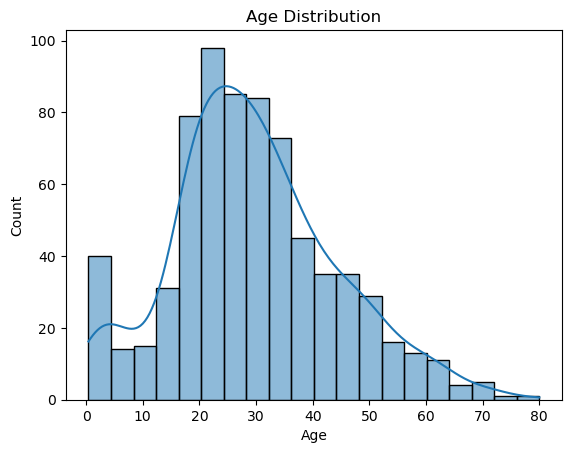

In [13]:
sns.histplot(df['Age'],kde=True)
plt.title('Age Distribution')

<Axes: >

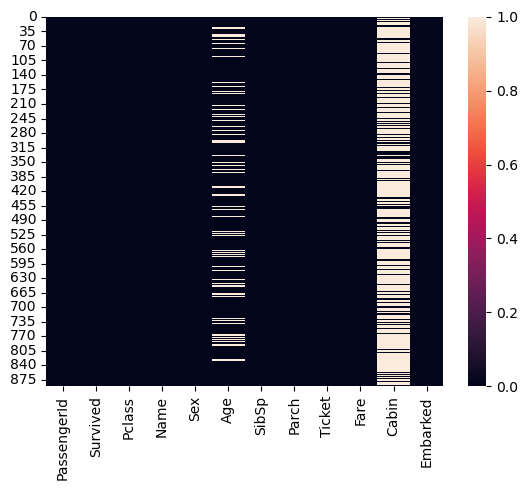

In [14]:
sns.heatmap(data = df.isnull())

In [15]:
# df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [16]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [17]:
df.dropna(axis=1,inplace=True)

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
df.duplicated().sum()

0

In [21]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [22]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [23]:
342/(549+342)*100
# somewhat balanced 

38.38383838383838

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#### Encoding the Gender using One Hot Encoding

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
encoder = OneHotEncoder(drop='if_binary',sparse_output=False)

In [27]:
gender_encoded = encoder.fit_transform(df[['Sex']])

In [28]:
df['Sex_encoded'] = gender_encoded

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1.0


#### Getting the Family Size by adding the siblings and parents

In [30]:
df['family_size'] = df['SibSp'] + df['Parch']

# Exploratory Data Analysis

In [31]:
import seaborn as sns

In [32]:
L = df.describe().columns

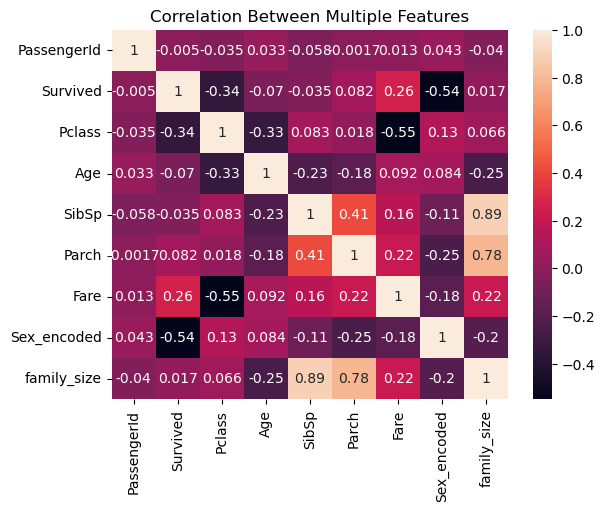

In [33]:
sns.heatmap(df[L].corr(),annot=True)
plt.title("Correlation Between Multiple Features")
plt.show()

In [34]:
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']

In [35]:
numerical_features

['PassengerId',
 'Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_encoded',
 'family_size']

In [36]:
categorical_features

['Name', 'Sex', 'Ticket', 'Embarked']

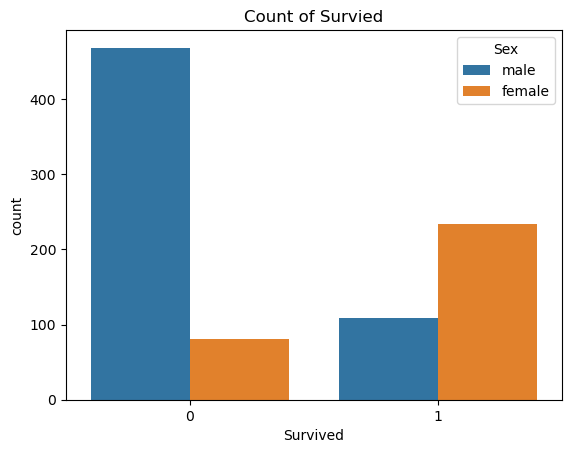

In [37]:
sns.countplot(data = df, x="Survived",hue='Sex')
plt.title("Count of Survied")
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

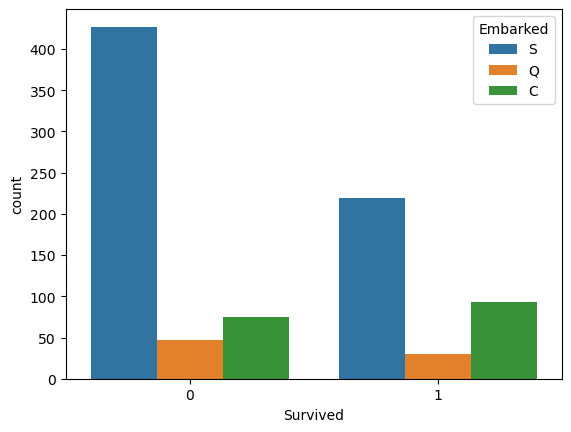

In [38]:
sns.countplot(data=df, x='Survived', hue='Embarked') 

<Axes: xlabel='Survived', ylabel='count'>

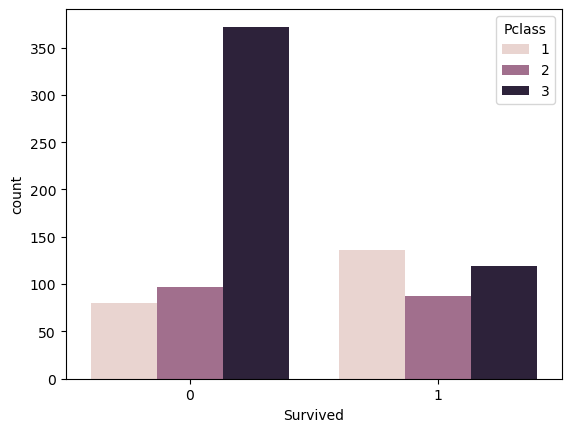

In [39]:
sns.countplot(data=df, x='Survived', hue='Pclass') 

<Axes: xlabel='Parch', ylabel='count'>

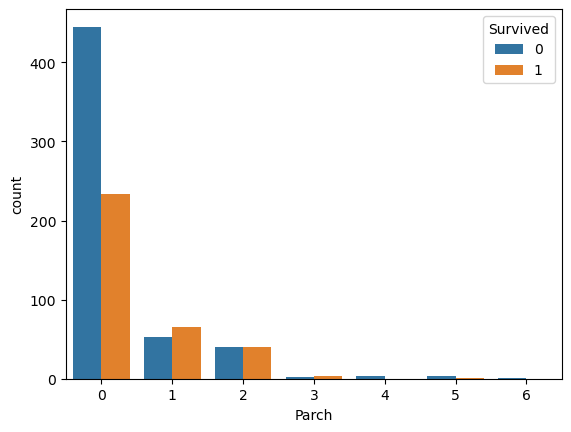

In [40]:
sns.countplot(data=df, x='Parch',hue='Survived') 

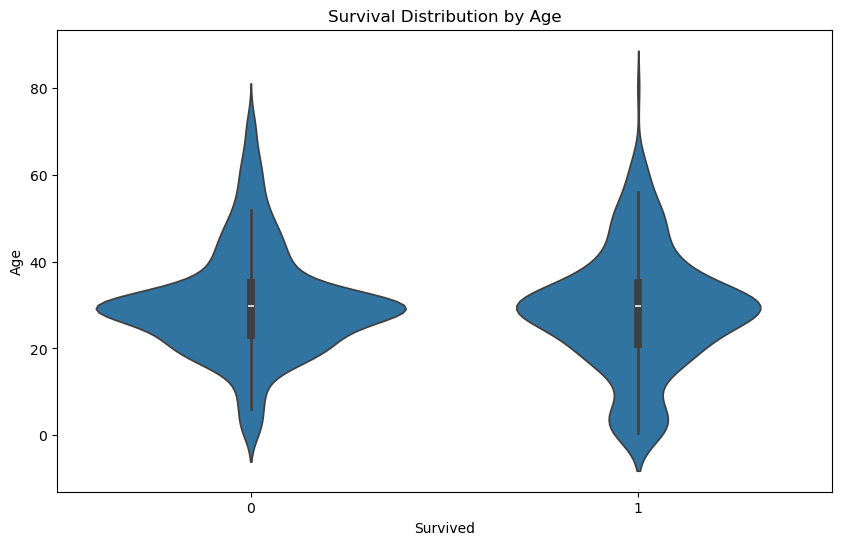

In [41]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(data = df, x='Survived', y='Age')
ax.set_title('Survival Distribution by Age')
plt.show()

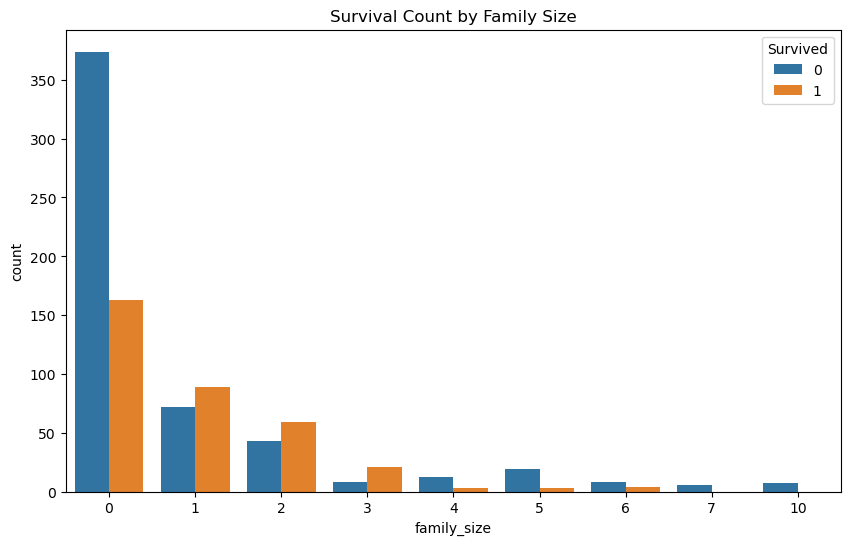

In [42]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='family_size', hue='Survived', data=df)
ax.set_title('Survival Count by Family Size')
plt.show()

### Model Traning and Prediction
-- Scaling Down the dataset values
-- Testing in Various Different Models
Sno. |Model|Accuracy|Precision|
|--|---|---|---|
|

In [43]:
numerical_features

['PassengerId',
 'Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_encoded',
 'family_size']

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
min_max = MinMaxScaler()

In [46]:
data = df[numerical_features]

In [47]:
min_max.fit(data)

MinMaxScaler()

In [48]:
data_scaled = min_max.fit_transform(data)

In [49]:
scaled_data = pd.DataFrame(data_scaled,columns=data.columns)

In [50]:
scaled_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_encoded,family_size
0,0.000000,0.0,1.0,0.271174,0.125,0.0,0.014151,1.0,0.1
1,0.001124,1.0,0.0,0.472229,0.125,0.0,0.139136,0.0,0.1
2,0.002247,1.0,1.0,0.321438,0.000,0.0,0.015469,0.0,0.0
3,0.003371,1.0,0.0,0.434531,0.125,0.0,0.103644,0.0,0.1
4,0.004494,0.0,1.0,0.434531,0.000,0.0,0.015713,1.0,0.0


In [51]:
x = scaled_data.drop('Survived',axis=1)
y = scaled_data['Survived']

In [52]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_encoded,family_size
0,0.000000,1.0,0.271174,0.125,0.000000,0.014151,1.0,0.1
1,0.001124,0.0,0.472229,0.125,0.000000,0.139136,0.0,0.1
2,0.002247,1.0,0.321438,0.000,0.000000,0.015469,0.0,0.0
3,0.003371,0.0,0.434531,0.125,0.000000,0.103644,0.0,0.1
4,0.004494,1.0,0.434531,0.000,0.000000,0.015713,1.0,0.0
...,...,...,...,...,...,...,...,...
886,0.995506,0.5,0.334004,0.000,0.000000,0.025374,1.0,0.0
887,0.996629,0.0,0.233476,0.000,0.000000,0.058556,0.0,0.0
888,0.997753,1.0,0.367921,0.125,0.333333,0.045771,0.0,0.3
889,0.998876,0.0,0.321438,0.000,0.000000,0.058556,1.0,0.0


In [53]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score as acc_s

In [60]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

#### Using Logistic Regression

In [136]:
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [133]:
y_predict = LR.predict(X_test)

In [134]:
print("The Mean Squared Error is {}".format(mse(y_test,y_predict)*100))

The Mean Squared Error is 20.670391061452513


In [135]:
print("Accuracy Score in Linear Regression is {}".format(acc_s(y_test,y_predict)*100))

Accuracy Score in Linear Regression is 79.3296089385475


In [131]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
DTC = DecisionTreeClassifier(criterion="entropy",splitter="best",max_depth=7,random_state=52)

#### Using DecisionTreeClassifier

In [113]:
DTC.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=52)

In [114]:
y_predict = DTC.predict(X_test)

In [115]:
mse(y_test,y_predict)*100

21.22905027932961

In [116]:
acc_s(y_test,y_predict)*100

78.77094972067039

#### Using ANN(Artificial Neural Network)

In [137]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10


C:\Users\pankr\miniconda3\envs\ev\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6097 - loss: 0.6762
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7109 - loss: 0.5961
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7811 - loss: 0.5291
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7836 - loss: 0.4747
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7698 - loss: 0.4734
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7873 - loss: 0.4646
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7804 - loss: 0.4701
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7830 - loss: 0.4461
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7971 - loss: 0.4273
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8001 - loss: 0.4232


In [138]:
y_predict = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [139]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy = acc_s(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.2f}')


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Test Accuracy: 0.78


In [140]:
n = 10
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [144]:
for i in range(10,0,-1):
    print(i)

10
9
8
7
6
5
4
3
2
1
